In [3]:
import pennylane as qml
from qoop.core import ansatz, state
import pennylane.numpy as nps
import qiskit
import numpy as np
from scipy.stats import unitary_group
from qiskit.circuit.library import UnitaryGate
num_qubits = 3
dev = qml.device("default.qubit")

qc = qiskit.QuantumCircuit(num_qubits)

u = UnitaryGate(unitary_group.rvs(2**num_qubits))

qc.append(u, range(num_qubits))
qcx = qiskit.transpile(qc, basis_gates=['h','s','cx','u','rx','ry','rz'], optimization_level=3)

@qml.qnode(dev, diff_method="parameter-shift")
def circuit2(thetas):
    for i in range(0, len(thetas), 3):
        qml.RX(thetas[i], wires = 0)
        qml.RY(thetas[i+1], wires = 1)
        qml.RZ(thetas[i+2], wires = 2)
        qml.CNOT(wires = [0, 1])
        qml.CNOT(wires = [1, 2])
    qml.from_qiskit(qcx)
    return qml.expval(qml.PauliZ(0))
    

def cost(thetas):
    return 1 - circuit2(thetas)

thetas = nps.random.uniform(0, 2*nps.pi, 18, requires_grad=True)
steps = 10
costs = []
opt = qml.AdamOptimizer(stepsize = 0.1)
for n in range(steps):
    thetas, prev_cost = opt.step_and_cost(cost, thetas)
    if prev_cost < 10^(-6):
        print("Achieved error threshold at step", n)
        break
    costs.append(prev_cost)

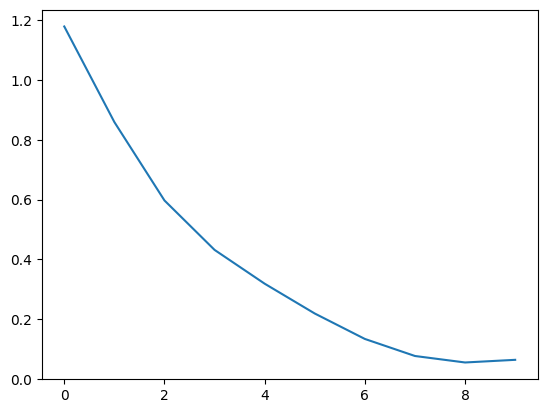

In [4]:
import matplotlib.pyplot as plt
plt.plot(costs)

In [14]:
from qoop.compilation.qcompilation import QuantumCompilation
from qoop.core import ansatz, state
import qiskit

num_qubits = 3
compiler = QuantumCompilation(
    u = ansatz.g2gn(num_qubits, 2),
    vdagger = state.ghz(num_qubits).inverse()
)

compiler.fit(num_steps=100)
print(compiler.metrics)

Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
{'loss_fubini_study': [0.7786367416703656, 0.6295032318966718, 0.517191858796423, 0.4149516150964443, 0.3222682247812552, 0.2817159101964603, 0.3040892276812658, 0.325958594469786, 0.3075863349964389, 0.26131605779821254, 0.21956947854592274, 0.1959201845625646, 0.17183094011869376, 0.13610855727012644, 0.10200835009029387, 0.0876037862435503, 0.08274542284874983, 0.06885028600955803, 0.04808938307662541, 0.04056806518266441, 0.050462146964934874, 0.05654639983254582, 0.05224286681773797, 0.042539257671741805, 0.035515437667522604, 0.033247293945733995, 0.031034674450111724, 0.02740975238310455, 0.025573548209534256, 0.026463038881428546, 0.026423872748276962, 0.0230579198715966, 0.017439373

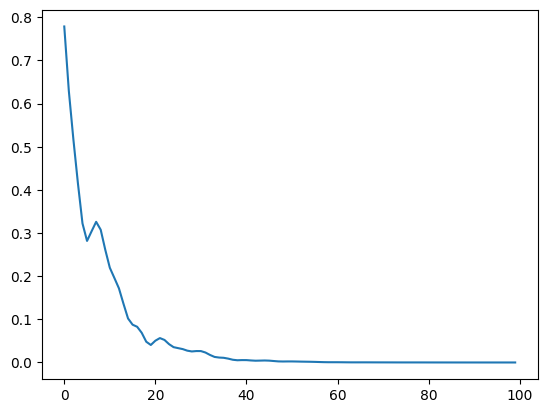

In [15]:
import matplotlib.pyplot as plt
plt.plot(compiler.metrics['loss_fubini_study'])